In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from torchmetrics.classification import ConfusionMatrix
import pickle

# Loading the data

In [32]:
X_test = pd.read_csv('data/Xtest.csv')
y_test = pd.read_csv('data/ytest.csv')

In [33]:
# Dropping the first column to fit the data
X_test.drop(columns='Unnamed: 0', inplace=True)
y_test.drop(columns='Unnamed: 0', inplace=True)

# Changing the data

In [34]:
# Making the tensors of the datasets for modelling
x_test_tensor=torch.tensor(X_test.values) 
y_test_tensor=torch.tensor(y_test.values)

In [35]:
# Changing the data type of datasets to fit them into the model
x_test_tensor=x_test_tensor.float()
y_test_tensor=y_test_tensor.float()

# Testing the MLP model

In [36]:
class MLP_NN(nn.Module):
    def __init__(self,hid_layer1, hid_layer2):
        super(MLP_NN, self).__init__()
        self.fc1 = nn.Linear(18, hid_layer1) # The first hidden layer takes 18 features and takes them into chosen number of neurons of hidden layer
        self.fc2 = nn.Linear(hid_layer1, hid_layer2) # The first hidden layer takes 18 features and takes them into chosen number of neurons of hidden layer
        self.fc3 = nn.Linear(hid_layer2, 1) #This is the output layer and it takes the input from chosen number of neurons of hidden layer, produces the output of one
        self.relu = nn.ReLU() # The activation function on both hidden layers 
        self.sigmoid = nn.Sigmoid() #The activation function, sigmoid is chosen as we have classification problem, it will produce the probability
        
    def forward(self, x):
        # The sequence of the model
        output = self.relu(self.fc1(x))
        output = self.relu(self.fc2(output))
        output = self.fc3(output)
        return output

In [37]:
mlp_model = MLP_NN(10,10)

In [38]:
# Loading the MLP model 
mlp_model = torch.load('mlp_model.pt')

In [39]:
criterion = nn.BCEWithLogitsLoss()
mlp_model.eval()
y_pred = mlp_model(x_test_tensor)
after_train = criterion(y_pred, y_test_tensor.reshape(-1,1))
y_pred_round = torch.round(y_pred)
correct_results = (y_pred_round == y_test_tensor.reshape(-1,1)).sum().float()
accuracy = correct_results / y_test_tensor.shape[0]
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.6521739363670349


In [40]:
from torchmetrics.classification import ConfusionMatrix
confmat = ConfusionMatrix(task="binary", num_classes=2)
cm = confmat(y_pred_round, y_test_tensor.reshape(-1,1))

[]

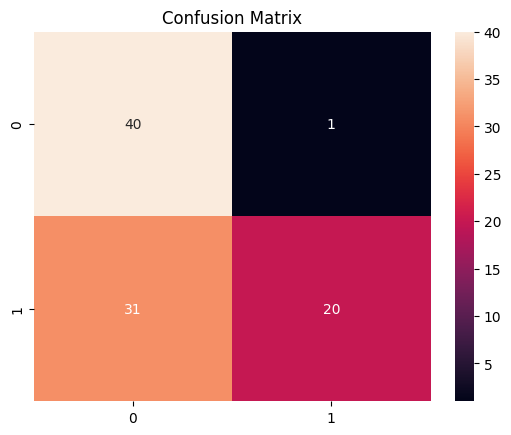

In [41]:
# Confusion Matrix for final testing of MLP
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.plot()

# Testing the SVM model

In [42]:
# Loading the SVM model
with open('svm_pkl', 'rb') as files:
    svm = pickle.load(files)

In [43]:
print(svm)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': (0, 1, 2, 3, 4, 5, 6),
                         'gamma': (0, 0.1, 1, 10),
                         'kernel': ('linear', 'rbf', 'poly')})


In [44]:
# Accuracy of the model
svm.score(X_test, y_test)

0.9021739130434783

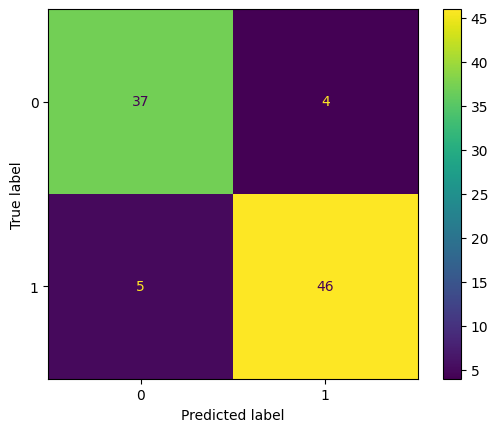

In [45]:
# Confusion matrix for final testing of SVM
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)